In [2]:
import pandas as pd

df = pd.read_csv('./data/whole_df.csv')
df.drop(columns="Unnamed: 0", inplace=True)                           # 불필요 컬럼 제거
df = df[['날짜', '월', '서적/문구', '소비자물가지수', '소매판매지수', '동월_평균_등락률', '전체_평균_대비',
       '전년_동월_대비', '소비']]
df['전년_동월_대비'] = df['전년_동월_대비'].astype(int)                 # int로 데이터 타입 변경

df

,날짜,월,서적/문구,소비자물가지수,소매판매지수,동월_평균_등락률,전체_평균_대비,전년_동월_대비,소비
0,201212,12,0.118333,0.001782,0.023590,0.164177,1,1,1
1,201301,1,-0.069215,0.005999,-0.086172,-0.077975,0,0,0
2,201302,2,-0.107126,0.003343,-0.048246,-0.093226,0,0,0
3,201303,3,0.471158,-0.000924,0.078341,0.390163,1,1,1
4,201304,4,-0.204835,-0.001388,-0.018162,-0.222949,0,0,1
...,...,...,...,...,...,...,...,...,...
106,202110,10,-0.008680,0.001745,0.018745,-0.045187,0,1,1
107,202111,11,-0.053841,0.005031,-0.002400,0.007351,0,0,0
108,202112,12,0.185547,0.001637,0.020048,0.164177,1,1,1
109,202201,1,-0.050630,0.006248,-0.076258,-0.077975,0,0,0


#### 피처와 레이블

In [3]:
data = df[["날짜", "서적/문구", "소비자물가지수", "소매판매지수", "전년_동월_대비"]]
target = df["소비"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   날짜         111 non-null    int64  
 1   월          111 non-null    int64  
 2   서적/문구      111 non-null    float64
 3   소비자물가지수    111 non-null    float64
 4   소매판매지수     111 non-null    float64
 5   동월_평균_등락률  111 non-null    float64
 6   전체_평균_대비   111 non-null    int64  
 7   전년_동월_대비   111 non-null    int32  
 8   소비         111 non-null    int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 7.5 KB


### 데이터 수동 분리

### 코로나 전, 후 데이터 분리

In [5]:
X_train = data[:96] 
X_test = data[97:] 
y_train = target[:96] 
y_test = target[97:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
         날짜     서적/문구   소비자물가지수    소매판매지수  전년_동월_대비
97   202101 -0.010869  0.007077 -0.057935         1
98   202102 -0.091223  0.005344 -0.053476         1
99   202103  0.341261  0.002560  0.125235         1
100  202104 -0.195506  0.001375 -0.005021         0
101  202105  0.045043  0.000686  0.032801         0
102  202106 -0.077637  0.000000 -0.026873         1
103  202107  0.090554  0.002058  0.005858         1
104  202108 -0.052783  0.004792 -0.030782         0
105  202109  0.048359  0.004088  0.053219         1
106  202110 -0.008680  0.001745  0.018745         1
107  202111 -0.053841  0.005031 -0.002400         0
108  202112  0.185547  0.001637  0.020048         1
109  202201 -0.050630  0.006248 -0.076258         0
110  202202 -0.163863  0.005827 -0.081702         0
y 테스트 데이터 :
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]


In [6]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(96, 5), 테스트 세트 Shape:(14, 5)
 학습 세트 레이블 값 분포 비율
1    0.6875
0    0.3125
Name: 소비, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.104167
0    0.041667
Name: 소비, dtype: float64


### 코로나 전 후 LogisticRegression, DecisionTree, RandomForest, GBM, XGBClassifier 정확도

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

data = df[["날짜", "서적/문구", "소비자물가지수", "소매판매지수", "전년_동월_대비"]]
target = df["소비"]

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-1)
gb_clf = GradientBoostingClassifier(random_state=11)
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)

# LogisticRegression 학습/예측/평가
lr_clf_time = time.time()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression 수행 시간: {0:.1f} 초'.format(time.time()-lr_clf_time))

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('\nDecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))
print('DecisionTree 수행 시간: {0:.1f} 초'.format(time.time()-dt_clf_time))

# RandomForestClassifier 학습/예측/평가
rf_clf_time = time.time()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForest 수행 시간: {0:.1f} 초'.format(time.time()-rf_clf_time))

# GBM 학습/예측/평가
gb_clf_time = time.time()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
print('\nGBM 정확도: {0:.4f}'.format(accuracy_score(y_test, gb_pred)))
print('GBM roc_auc: {:0.3f}'.format(roc_auc_score(y_test, gb_pred)))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-gb_clf_time))

# XGBClassifier 학습/예측/평가
xgb_wrapper_time = time.time()
xgb_wrapper.fit(X_train, y_train)
xgb_pred = xgb_wrapper.predict(X_test)
print('\nXGBC 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))
print('XGBC roc_auc: {:0.3f}'.format(roc_auc_score(y_test, xgb_pred)))
print('XGBC 수행 시간: {0:.1f} 초'.format(time.time()-xgb_wrapper_time))

# 언더피팅인 LogisticRegression은 편향이 적고 분산이 높은 DecisionTreeClassifier 또는 RandomForestClassifier로 극복 가능
# 오버피팅인 DecisionTreeClassifier와 RandomFOrestClassifier는 학습 데이터에서 검증 데이터를 분리해 극복 가능

LogisticRegression 정확도: 0.7143
LogisticRegression roc_auc: 0.500
LogisticRegression 수행 시간: 0.0 초

DecisionTreeClassifier 정확도: 0.9286
DecisionTreeClassifier roc_auc: 0.950
DecisionTree 수행 시간: 0.0 초

RandomForestClassifier 정확도: 0.9286
RandomForestClassifier roc_auc: 0.950
RandomForest 수행 시간: 0.3 초

GBM 정확도: 0.9286
GBM roc_auc: 0.950
GBM 수행 시간: 0.1 초

XGBC 정확도: 0.9286
XGBC roc_auc: 0.950
XGBC 수행 시간: 0.4 초


#### 최적화 작업 전이기 때문에 어떤 알고리즘의 성능이 좋고 나쁜지 평가할 수 없음.

### 데이터 검증

### KFold

In [8]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [9]:
# Logisticregression KFold
exec_kfold(lr_clf, folds=5)

교차 검증 0 정확도: 0.6957
교차 검증 1 정확도: 0.7273
교차 검증 2 정확도: 0.7273
교차 검증 3 정확도: 0.6818
교차 검증 4 정확도: 0.5909
평균 정확도: 0.6846


In [10]:
# DecisionTree KFold
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.9130
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 0.9545
교차 검증 3 정확도: 0.7727
교차 검증 4 정확도: 0.6364
평균 정확도: 0.8462


In [11]:
# RandomForest KFold
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 1.0000
교차 검증 3 정확도: 0.7727
교차 검증 4 정확도: 0.9091
평균 정확도: 0.9186


In [12]:
# GBM KFold
exec_kfold(gb_clf, folds=5)

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 0.9545
교차 검증 3 정확도: 0.8182
교차 검증 4 정확도: 0.9091
평균 정확도: 0.9186


In [13]:
# XGBC KFold
exec_kfold(xgb_wrapper, folds=5)

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 0.9091
교차 검증 2 정확도: 0.9545
교차 검증 3 정확도: 0.7727
교차 검증 4 정확도: 0.9545
평균 정확도: 0.9095


In [14]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
n_iter=0
cv_accuracy=[]

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data, target):
    n_iter += 1
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

학습 레이블 데이터 분포:
 1    60
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     7
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    63
0    26
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    13
0     9
Name: 소비, dtype: int64


In [15]:
# DecisionTree KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # DecisionTree 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.913, 학습 데이터 크기: 88, 검증데이터 크기: 23
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
학습 레이블 데이터 분포:
 1    60
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     7
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.9545, 학습 데이터 크기: 89, 검증데이터 크기: 22
#2 검증 세트 인덱스:[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64

#3 교차 검증 정확도 :0.9545, 학습 데이터 크기: 89, 검증데이터 크기: 22
#3 검증 세트 인덱스:[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.7727, 학습 데이터 크기: 89, 검증데이터 크기: 22
#4 검증 세트 인덱스:[67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64

#5 교차 검증 정확도 :0.6364, 학습 데이터 

In [16]:
# RandomForest KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # RandomForest 학습 및 예측
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)

print('\n##  교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.9565, 학습 데이터 크기: 88, 검증데이터 크기: 23
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
학습 레이블 데이터 분포:
 1    60
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     7
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.9545, 학습 데이터 크기: 89, 검증데이터 크기: 22
#2 검증 세트 인덱스:[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64

#3 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증데이터 크기: 22
#3 검증 세트 인덱스:[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
학습 레이블 데이터 분포:
 1    60
0    29
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     6
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.7727, 학습 데이터 크기: 89, 검증데이터 크기: 22
#4 검증 세트 인덱스:[67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64

#5 교차 검증 정확도 :0.9091, 학습 데이터 크기

### StratifiedKFold, cross_val_score()
#### 불균형한 분포도를 가진 레이블 데이터 집합에 사용
#### 레이블 분포도에 따라 학습/검증 데이터를 나눈다.

In [17]:
from sklearn.model_selection import StratifiedKFold

def exec_skfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    skfold = StratifiedKFold(n_splits=folds)
    scores = []
    
    # SKFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(skfold.split(data, target)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [18]:
# DecisionTree SKFold
exec_skfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.9130
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.9091
교차 검증 4 정확도: 0.9091
평균 정확도: 0.9099


In [19]:
# RandomForest SKFold
exec_skfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.8636
교차 검증 4 정확도: 0.9545
평균 정확도: 0.9277


In [20]:
# GBN SKFold
exec_skfold(gb_clf, folds=5)

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.9091
교차 검증 4 정확도: 0.9545
평균 정확도: 0.9368


In [21]:
# XGBC SKFold
exec_skfold(xgb_wrapper, folds=5)

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 0.8636
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.9091
교차 검증 4 정확도: 0.9545
평균 정확도: 0.9095


In [22]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in skfold.split(data, target):
    n_iter += 1
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# KFold 에서는 학습 레이블과 검증 레이블 값의 분포도가 불균형했지만, StratifiedKFold를 통해 분포도가 동일하게 할당됐다.

학습 레이블 데이터 분포:
 1    60
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    16
0     7
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64
학습 레이블 데이터 분포:
 1    61
0    28
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    15
0     7
Name: 소비, dtype: int64


In [23]:
# DecisionTree StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))



1 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 23
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#2 검증 세트 인덱스:[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#3 검증 세트 인덱스:[43 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 66 69 72]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#4 검증 세트 인덱스:[63 65 67 68 70 71 73 74 75 76 77 78 79 80 81 82 83 84 85 86 90 91]

5 교차 검증 정확도 :0.9091, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#5 검증 세트 인덱스:[ 87  88  89  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110]

## 교차 검증별 정확도: [1.     1.     1.     1.     0.9091]
## 평균 검증 정확도: 0.9818200000000001


In [24]:
# RandomForest StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 23
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#2 검증 세트 인덱스:[23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#3 검증 세트 인덱스:[43 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 66 69 72]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#4 검증 세트 인덱스:[63 65 67 68 70 71 73 74 75 76 77 78 79 80 81 82 83 84 85 86 90 91]

5 교차 검증 정확도 :0.9545, 학습 데이터 크기: 89, 검증 데이터 크기: 22
#5 검증 세트 인덱스:[ 87  88  89  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110]

## 교차 검증별 정확도: [1.     1.     1.     1.     0.9545]
## 평균 검증 정확도: 0.9909000000000001


### cross_val_score
#### classifier가 입력되면 자동으로 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.

In [25]:
from sklearn.model_selection import cross_val_score

# DecisionTree cross_val_score
scores = cross_val_score(dt_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.9130
교차 검증 1 정확도: 0.9545
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.9091
교차 검증 4 정확도: 0.9091
평균 정확도: 0.9099


In [26]:
# RandomForest cross_val_score
scores = cross_val_score(rf_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.9565
교차 검증 1 정확도: 1.0000
교차 검증 2 정확도: 0.8636
교차 검증 3 정확도: 0.8636
교차 검증 4 정확도: 0.9545
평균 정확도: 0.9277


### GridSearchCV
#### 교차 검증과 최적 하이퍼 파라미터 한번에 찾기

In [27]:
# DecisionTreeClassifier GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 4, 5, 6],\
            'min_samples_split':[2, 3, 4, 5, 6],\
            'min_samples_leaf':[1, 5, 6, 7, 8]}

def best_dtparam(clf, param, scoring_name, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num,)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_est = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    predictions = best_est.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
    
best_dtparam(dt_clf, parameters, 'accuracy', 5)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.9105
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9091


In [28]:
# 최적 하이퍼 파라미터 적용
dt_clf1 = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=5)
dt_clf1.fit(X_train, y_train)
dt1_pred = dt_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, dt1_pred)))

예측 정확도: 0.9545


In [29]:
# RandomForestClassifier GridSearchCV

parameters = {\
        'n_estimators':[100],\
        'max_depth' : [6, 8, 10, 12],\
        'min_samples_leaf' : [6, 8, 10, 12],\
        'min_samples_split' : [4, 6, 8, 10, 12]
}

def best_rfparam(clf, param, cv_num, n_jobs_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, n_jobs=n_jobs_num, refit=True)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_est = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    predictions = best_est.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

# n_estimators : 결정 트리의 개수 지정. default=10
# n_jobs 파라미터에 -1를 추가하면 모든 CPU 코어를 이용해 학습
start_time = time.time()
best_rfparam(rf_clf, parameters, 2, -1)
end_time = time.time() - start_time
print('RandomForest GridSearchCV 수행 시간: {0:.1f} 초'.format(end_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 100}
GridSearchCV 최고 정확도 :0.9210
테스트 세트에서의 RandomForestClassifier 정확도 : 0.9545
RandomForest GridSearchCV 수행 시간: 23.6 초


In [30]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=6, min_samples_split=4, random_state=11)
rf_clf1.fit(X_train, y_train)
rf1_pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, rf1_pred)))

예측 정확도: 0.9545


### 피처중요도

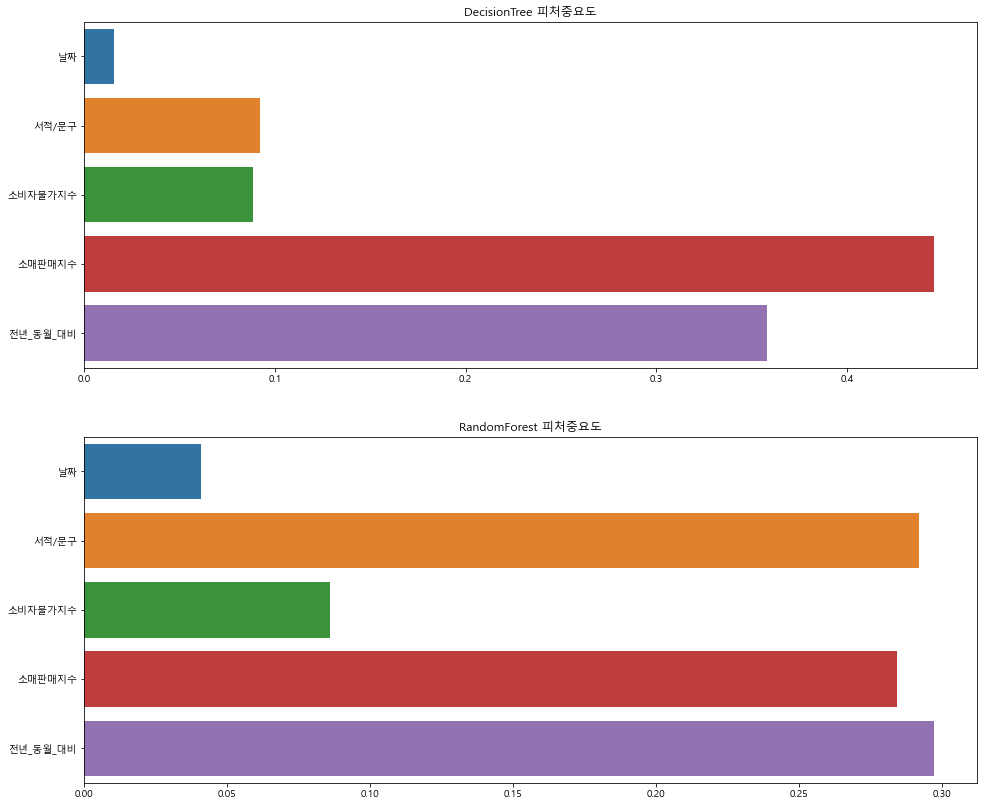

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(2, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

plt.show()

### GBM

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# 시작 시간
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=11)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9545
GBM 수행 시간: 0.2 초


In [33]:
# GBM GridSearchCV

parameters = {\
        'n_estimators':[100, 300, 500],\
        'learning_rate' : [0.025, 0.05, 0.1],
}

def best_rfparam(clf, param, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_est = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    predictions = best_est.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print('테스트 세트에서의 GBMClassifier 정확도 : {0:.4f}'.format(accuracy))

start_time = time.time()
best_rfparam(gb_clf, parameters, 2)
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'learning_rate': 0.025, 'n_estimators': 100}
GridSearchCV 최고 정확도 :0.7987
테스트 세트에서의 GBMClassifier 정확도 : 0.9545
GBM 수행 시간: 6.1 초


In [34]:
# 최적 하이퍼 파라미터 적용
gb_clf1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=300)
gb_clf1.fit(X_train, y_train)
gb1_pred = gb_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, gb1_pred)))

예측 정확도: 0.9545


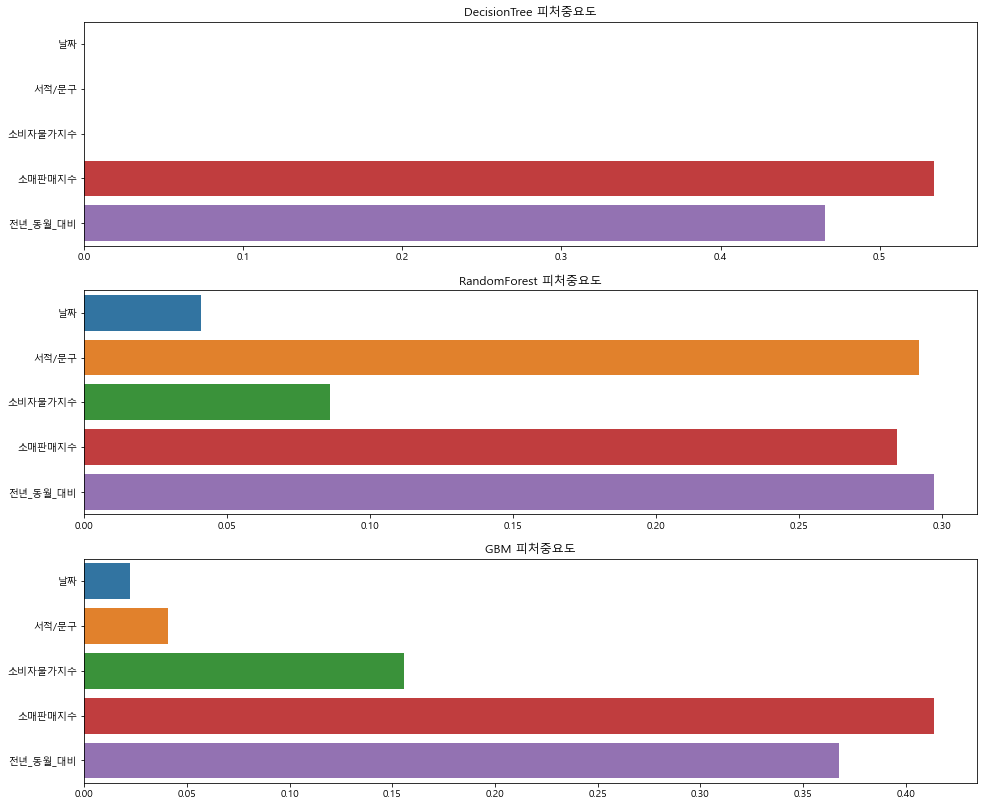

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(3, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")
sns.barplot(x=gb_clf1.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

plt.show()

### XGBoost

In [36]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth':3,
        'eta':0.1,
        'objective':'binary:logistic',
        'eval_metric':'error',
        'early_stoppings':100
        }

num_rounds = 300

wlist = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[16:01:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-error:0.03371	test-error:0.04545
[1]	train-error:0.03371	test-error:0.04545
[2]	train-error:0.03371	test-error:0.04545
[3]	train-error:0.03371	test-error:0.04545
[4]	train-error:0.03371	test-error:0.04545
[5]	train-error:0.03371	test-error:0.04545
[6]	train-error:0.03371	test-error:0.04545
[7]	train-error:0.03371	test-error:0.04545
[8]	train-error:0.03371	test-error:0.04545
[9]	train-error:0.03371	test-error:0.04545
[10]	train-error:0.03371	test-error:0.04545
[11]	train-error:0.03371	test-error:0.04545
[12]	train-error:0.03371	test-error:0.04545
[13]	train-err

In [37]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괐값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결괐값을 10개만 표시, 예측 확률값으로 표시됨
[0.932 0.989 0.99  0.098 0.934 0.114 0.92  0.096 0.922 0.922]
예측값 10개만 표시: [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [39]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333, F1:0.9655, AUC:0.9714


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

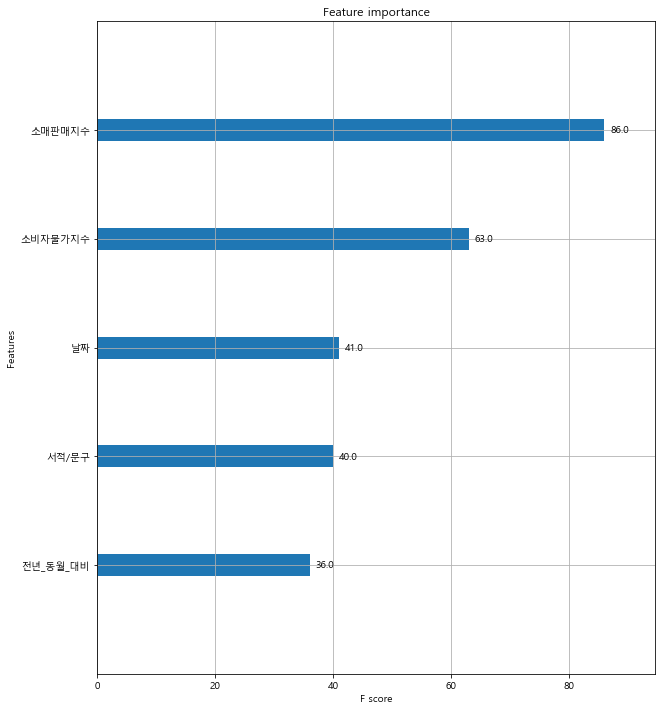

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### XGBClassifier

In [41]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict(X_test)

get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333, F1:0.9655, AUC:0.9667


In [42]:
xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="error", eval_set=evals, verbose=1)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-error:0.04545
[1]	validation_0-error:0.04545
[2]	validation_0-error:0.04545
[3]	validation_0-error:0.04545
[4]	validation_0-error:0.04545
[5]	validation_0-error:0.04545
[6]	validation_0-error:0.04545
[7]	validation_0-error:0.04545
[8]	validation_0-error:0.04545
[9]	validation_0-error:0.04545
[10]	validation_0-error:0.04545
[11]	validation_0-error:0.04545
[12]	validation_0-error:0.04545
[13]	validation_0-error:0.04545
[14]	validation_0-error:0.04545
[15]	validation_0-error:0.04545
[16]	validation_0-error:0.04545
[17]	validation_0-error:0.04545
[18]	validation_0-error:0.04545
[19]	validation_0-error:0.04545
[20]	validation_0-error:0.04545
[21]	validation_0-error:0.04545
[22]	validation_0-error:0.04545
[23]	validation_0-error:0.04545
[24]	validation_0-error:0.04545
[25]	validation_0-error:0.04545
[26]	validation_0-error:0.04545
[27]	validation_0-error:0.04545
[28]	validation_0-error:0.04545
[29]	validation_0-error:0.04545
[30]	validation_0-error:0.04545
[31]	validation_0-

In [43]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333, F1:0.9655, AUC:0.9571


In [44]:
# XGBClassifier GridSearchCV

parameters = {\
        'max_depth':[3, 4, 5],\
        'min_child_weight' : [1, 3, 5],\
        'colsample_bytree' : [0.25, 0.5, 0.75]
}

def best_xgbcparam(clf, param, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 XGBClassifier 정확도 : {0:.4f}'.format(accuracy))
    
    xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
    print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

start_time = time.time()
best_xgbcparam(xgb_wrapper, parameters, 3)
print('XGBC 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'colsample_bytree': 0.75, 'max_depth': 3, 'min_child_weight': 1}
GridSearchCV 최고 정확도 :0.9203
테스트 세트에서의 XGBClassifier 정확도 : 0.9545
ROC AUC: 0.9619
XGBC 수행 시간: 46.5 초


In [45]:
xgb_wrapper = XGBClassifier(n_estimators=1000, random_state=11, learning_rate=0.02, max_depth=3, min_child_weight=3, colsample_bytree=0.75, reg_alpha=0.03)

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='error', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_wrapper.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-error:0.20225	validation_1-error:0.27273
[1]	validation_0-error:0.08989	validation_1-error:0.13636
[2]	validation_0-error:0.08989	validation_1-error:0.13636
[3]	validation_0-error:0.08989	validation_1-error:0.18182
[4]	validation_0-error:0.06742	validation_1-error:0.13636
[5]	validation_0-error:0.06742	validation_1-error:0.13636
[6]	validation_0-error:0.04494	validation_1-error:0.09091
[7]	validation_0-error:0.04494	validation_1-error:0.09091
[8]	validation_0-error:0.04494	validation_1-error:0.09091
[9]	validation_0-error:0.04494	validation_1-error:0.09091
[10]	validation_0-error:0.03371	validation_1-error:0.04545
[11]	validation_0-error:0.05618	validation_1-error:0.09091
[12]	validation_0-error:0.05618	validation_1-error:0.09091
[13]	validation_0-error:0.04494	validation_1-error:0.09091
[14]	validation_0-error:0.04494	validation_1-error:0.09091
[15]	validation_0-error:0.04494	validation_1-error:0.09091
[16]	validation_0-error:0.04494	validation_1-error:0.09091
[17]	va

여전히 과적합 -> 하이퍼 파라미터 재조정 필요

In [46]:
# 최적 하이퍼 파라미터 적용
xgb_wrapper1 =XGBClassifier(n_estimators=1000, random_state=11, learning_rate=0.02, max_depth=3, min_child_weight=5, colsample_bytree=0.5)
xgb_wrapper1.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='error', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb1_pred = xgb_wrapper.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb1_pred)))

[0]	validation_0-error:0.20225	validation_1-error:0.27273
[1]	validation_0-error:0.07865	validation_1-error:0.04545
[2]	validation_0-error:0.08989	validation_1-error:0.18182
[3]	validation_0-error:0.07865	validation_1-error:0.18182
[4]	validation_0-error:0.07865	validation_1-error:0.18182
[5]	validation_0-error:0.11236	validation_1-error:0.22727
[6]	validation_0-error:0.11236	validation_1-error:0.18182
[7]	validation_0-error:0.11236	validation_1-error:0.18182
[8]	validation_0-error:0.07865	validation_1-error:0.13636
[9]	validation_0-error:0.05618	validation_1-error:0.09091
[10]	validation_0-error:0.05618	validation_1-error:0.09091
[11]	validation_0-error:0.05618	validation_1-error:0.09091
[12]	validation_0-error:0.05618	validation_1-error:0.09091
[13]	validation_0-error:0.05618	validation_1-error:0.09091
[14]	validation_0-error:0.05618	validation_1-error:0.09091
[15]	validation_0-error:0.04494	validation_1-error:0.09091
[16]	validation_0-error:0.05618	validation_1-error:0.09091
[17]	va

#### XGBoost 시각화

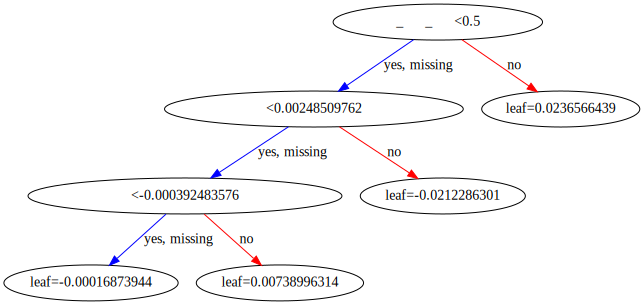

In [47]:
xgb.to_graphviz(xgb_wrapper, num_trees=45)

### 최적화 전 피처중요도

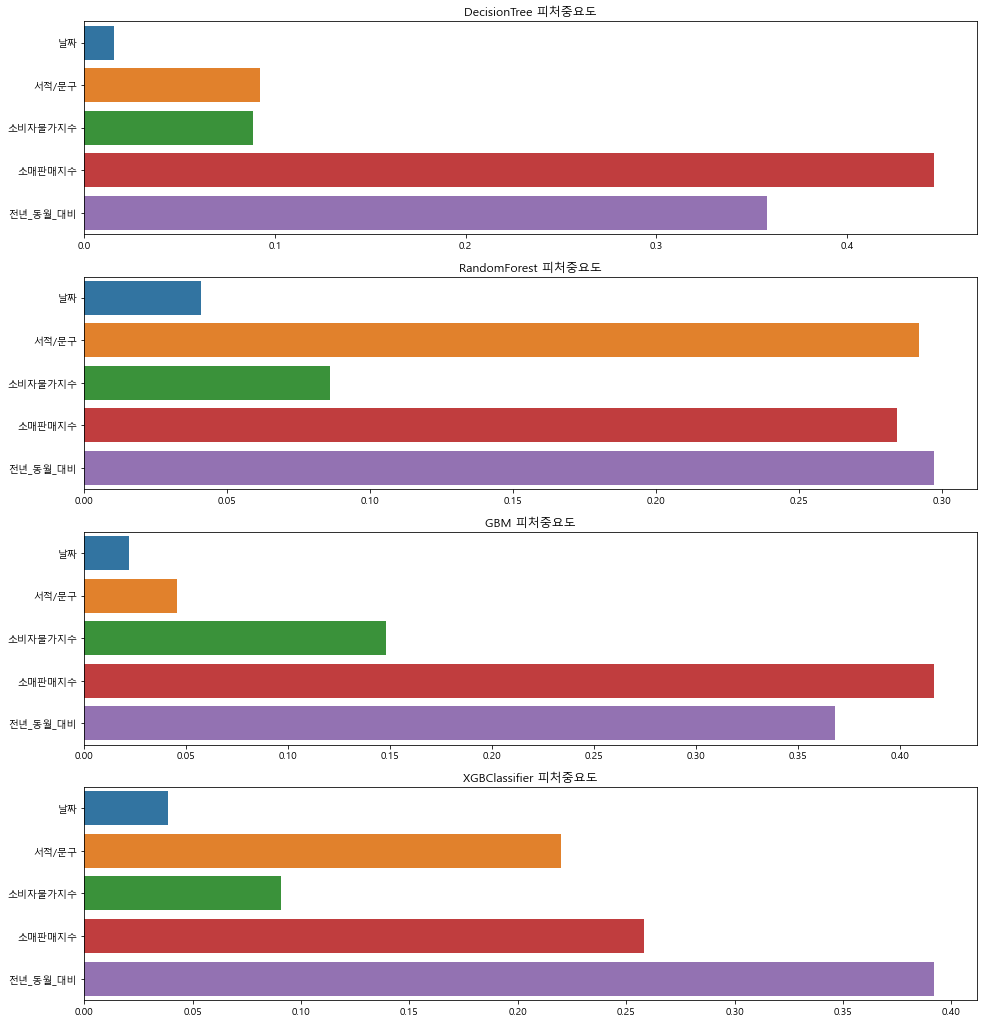

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((16, 18))

sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

sns.barplot(x=xgb_wrapper.feature_importances_, y=data.columns, ax=axes[3,0])
axes[3,0].title.set_text("XGBClassifier 피처중요도")

plt.show()

### 최적화 후 피처중요도

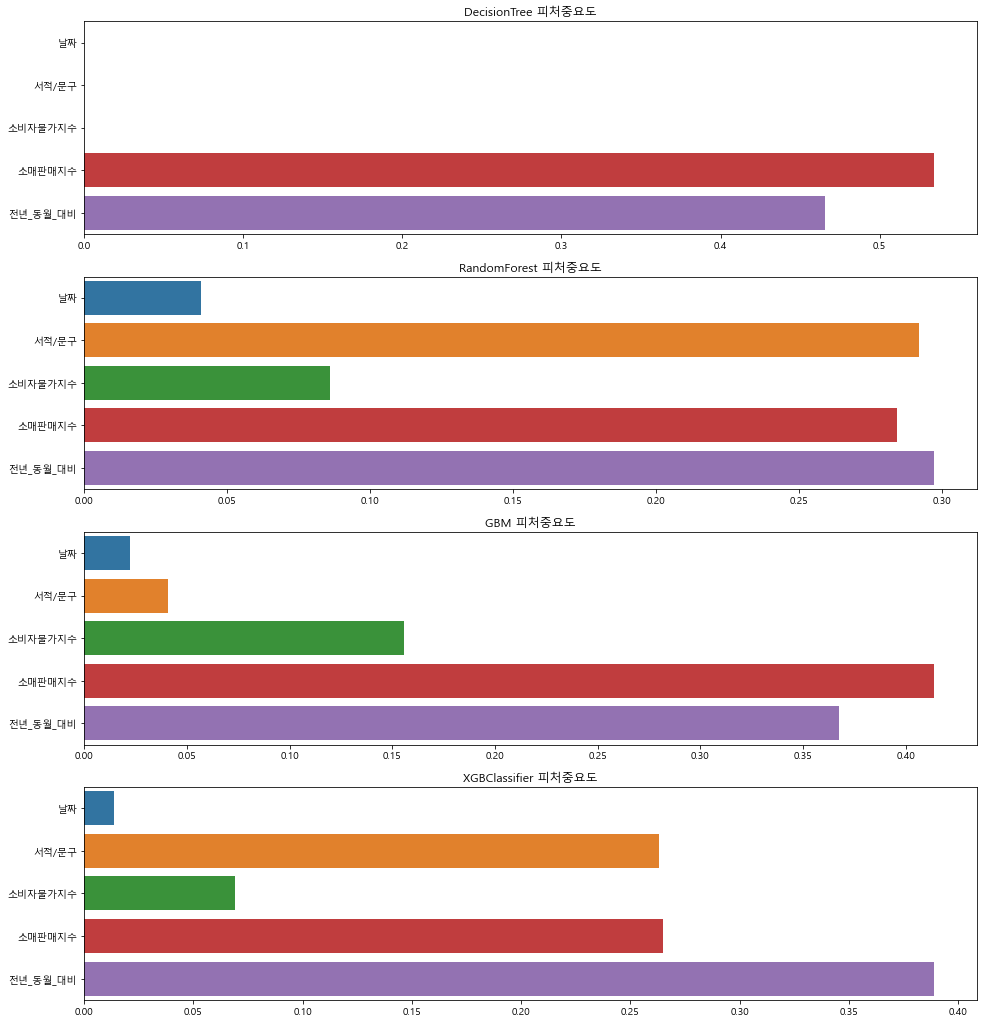

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((16, 18))

sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf1.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

sns.barplot(x=xgb_wrapper1.feature_importances_, y=data.columns, ax=axes[3,0])
axes[3,0].title.set_text("XGBClassifier 피처중요도")

plt.show()

### 알고리즘 별 정확도 비교
#### 둘의 점수의 차이가 작다는 것은 train 데이터와 test 데이터 모두에게 그럭저럭 잘 들어맞는 걸 의미함.

#### 그 말은 training data 에 과대적합되있지 않고, 
#### 훈련데이터 뿐만 아니라 다른 데이터에도 그럭저럭 잘 맞기에 "일반화"하기에 유리하다고 할 수 있다.

In [50]:
from sklearn.model_selection import cross_validate

splitter = KFold(n_splits=5)
scores_lr_clf = cross_validate(lr_clf, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_dt_clf = cross_validate(dt_clf, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_rf_clf = cross_validate(rf_clf, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_gb_clf = cross_validate(gb_clf, data, target, cv=splitter, n_jobs=-1, return_train_score=True)
scores_xgb_wrapper = cross_validate(xgb_wrapper, data, target, cv=splitter, n_jobs=-1, return_train_score=True)

In [51]:
print('선형회귀 train data score : ',np.mean(scores_lr_clf['train_score']))
print('선형회귀 test data score : ',np.mean(scores_lr_clf['test_score']))

print('결정트리(Decision Tree) train data score : ',np.mean(scores_dt_clf['train_score']))
print('결정트리(Decision Tree) test data score : ',np.mean(scores_dt_clf['test_score']))
print('랜덤포레스트 train data score : ',np.mean(scores_rf_clf['train_score']))
print('랜덤포레스트 test data score : ',np.mean(scores_rf_clf['test_score']))

print('gradientboost train data score : ',np.mean(scores_gb_clf['train_score']))
print('gradientboost test data score : ',np.mean(scores_gb_clf['test_score']))

print('XGB train data score : ',np.mean(scores_xgb_wrapper['train_score']))
print('XGB test data score : ',np.mean(scores_xgb_wrapper['test_score']))

선형회귀 train data score :  0.6846782431052094
선형회귀 test data score :  0.6845849802371541
결정트리(Decision Tree) train data score :  1.0
결정트리(Decision Tree) test data score :  0.8462450592885377
랜덤포레스트 train data score :  1.0
랜덤포레스트 test data score :  0.9185770750988143
gradientboost train data score :  1.0
gradientboost test data score :  0.9185770750988143
XGB train data score :  0.9707354443309499
XGB test data score :  0.9276679841897234


## 평가

### 오차행렬
#### TN : 환자를 암이 아니라 예측했고 실제로도 암이 아님
#### FP : 환자를 암이 맞다고 예측했고 실제로는 암이 아님 -> 1종 오류
#### FN : 환자를 암이 아니라 예측했고 실제로는 암이 맞음 -> 2종 오류
#### TP : 환자를 암이 맞다고 예측했고 실제로도 암이 맞음

In [52]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, rf1_pred)
print("오차행렬:\n", c_matrix)

오차행렬:
 [[ 7  0]
 [ 1 14]]


### 정밀도와 재현율
#### 정밀도 = TP / (FP + TP), 양성으로 판단한 것 중, 진짜 양성의 비율, FP를 낮추는데 초점
#### 재현율 = TP / (FN + TP), 진짜 양성인 것들 중, 올바르게 양성으로 판단한 비율, FN을 낮추는데 초점
#### 소비가 많은 월을 0이라 판단하게 되면 큰 영향이 발생하기 때문에 재현율이 더 중요하다.
#### 소비가 많이 없는 월을 1이라 판단하더라도 혜택이 있다면 소비가 늘어날 수도있기 때문에 정밀도<재현율

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
get_clf_eval(y_test, rf1_pred)

오차 행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333


### 정밀도/재현율 트레이드오프
#### 정밀도와 재현율 값이 똑같이 나왔기 때문에 더 중요한 재현율 값을 올려준다.

In [54]:
pred_proba = rf_clf1.predict_proba(X_test)
pred = rf_clf1.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: \n', pred_proba_result[:3])

pred_proba()결과 Shape : (22, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.2513614  0.7486386 ]
 [0.03558622 0.96441378]
 [0.033364   0.966636  ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: 
 [[0.2513614  0.7486386  1.        ]
 [0.03558622 0.96441378 1.        ]
 [0.033364   0.966636   1.        ]]


In [55]:
from sklearn.preprocessing import Binarizer
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

# 오차행렬, 정확도, 정밀도, 재현율 함수
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.1
오차 행렬
[[ 0  7]
 [ 0 15]]
정확도: 0.6818, 정밀도: 0.6818, 재현율: 1.0000
임곗값: 0.2
오차 행렬
[[ 2  5]
 [ 1 14]]
정확도: 0.7273, 정밀도: 0.7368, 재현율: 0.9333
임곗값: 0.3
오차 행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333
임곗값: 0.4
오차 행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333
임곗값: 0.5
오차 행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333


In [56]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

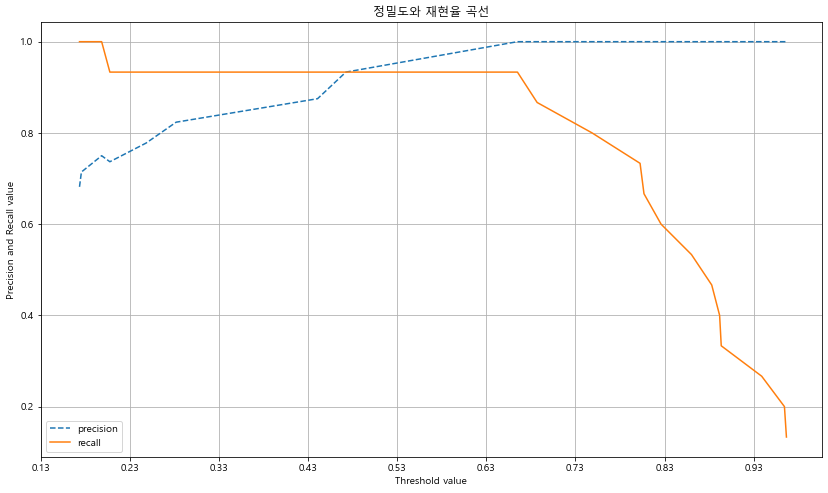

In [57]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))
    # 임곗값 수치    
    threshold_boundary = thresholds.shape[0]
    # 정밀도는 점선으로
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # 재현율은 선으로
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    # x축을 0.1씩 증가, 소수점 둘째자리까지 표시
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, rf_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

In [58]:
precision_recall_curve(y_test, rf_clf1.predict_proba(X_test)[:, 1])

(array([0.68181818, 0.71428571, 0.75      , 0.73684211, 0.77777778,
        0.82352941, 0.875     , 0.93333333, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
        0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.86666667,
        0.8       , 0.73333333, 0.66666667, 0.6       , 0.53333333,
        0.46666667, 0.4       , 0.33333333, 0.26666667, 0.2       ,
        0.13333333, 0.        ]),
 array([0.17366574, 0.17580169, 0.19850691, 0.20772376, 0.24837671,
        0.28205959, 0.4406722 , 0.47248514, 0.66491092, 0.68702667,
        0.7486386 , 0.80245996, 0.80684928, 0.82601213, 0.86011877,
        0.8828436 , 0.89169618, 0.89352442, 0.93887857, 0.96441378,
        0.966636  ]))

### F1 스코어
#### 정밀도와 재현율 결합 지표

In [59]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, rf1_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9655


In [60]:
# 오차행렬, 정확도, 정밀도, 재현율 함수에 F1스코어 추가
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.2, 0.3, 0.4, 0.45, 0.5]
pred_proba = rf_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

# 임곗값이 0.4일 때 재현율이 정밀도 보다 높고 정확도와 F1 스코어 역시 좋은 수치
# 정확도: 0.8182, 정밀도: 0.8000, 재현율: 0.9231, F1:0.8571

임곗값: 0.2
오차행렬
[[ 2  5]
 [ 1 14]]
정확도: 0.7273, 정밀도: 0.7368, 재현율: 0.9333, F1:0.8235
임곗값: 0.3
오차행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333, F1:0.9032
임곗값: 0.4
오차행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333, F1:0.9032
임곗값: 0.45
오차행렬
[[ 6  1]
 [ 1 14]]
정확도: 0.9091, 정밀도: 0.9333, 재현율: 0.9333, F1:0.9333
임곗값: 0.5
오차행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333, F1:0.9655


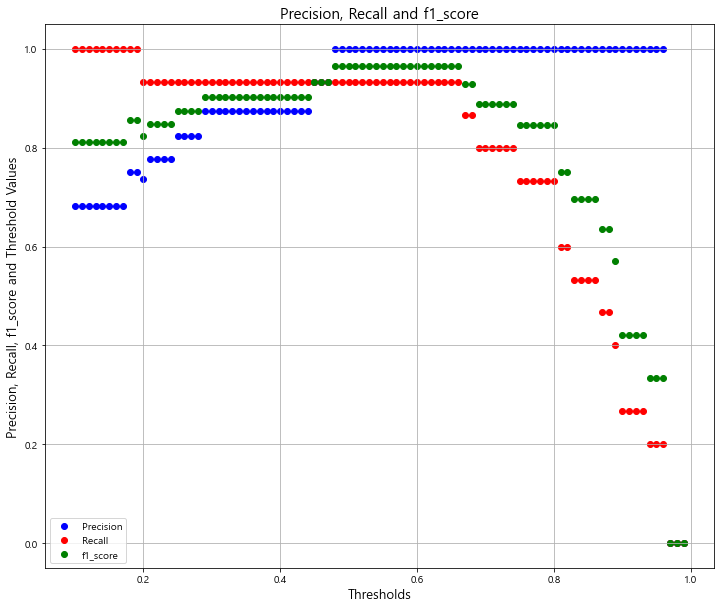

In [61]:
thresholds = list(np.arange(0.1, 1, 0.01))
pred_proba = rf_clf1.predict_proba(X_test)

def graph_f1score(y_test, pred_proba, thresholds):
    for i in thresholds:
        binarizer = Binarizer(threshold = i).fit(pred_proba)
        pred = binarizer.transform(pred_proba)

        plt.scatter(i, precision_score(y_test, pred), color='b', label='precision')
        plt.scatter(i, recall_score(y_test, pred), color='r', label='recall')
        plt.scatter(i, f1_score(y_test, pred), color='g', label='f1_score')

plt.figure(figsize=(12,10))
plt.title("Precision, Recall and f1_score", fontsize=15)
plt.xlabel('Thresholds', fontsize=13)
plt.ylabel('Precision, Recall, f1_score and Threshold Values', fontsize=13)
graph_f1score(y_test, pred_proba[:,-1].reshape(-1, 1), thresholds)
plt.legend(['Precision', 'Recall', 'f1_score'])
plt.grid()
plt.show()

### ROC 곡선과 AUC
#### 이진 분류 모델 예측 성능 판단 평가 지표
#### 민감도(TPR), 재현율: 실제값 positive가 정확히 예측돼야 하는 수준
#### 특이성(TNR): 실제값 negative가 정확히 예측돼야 하는 수준

In [62]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [1 2 3 4 5]
샘플 index로 추출한 임곗값:  [0.97 0.66 0.21 0.2  0.17]
샘플 임곗값별 FPR:  [0.    0.    0.714 0.714 1.   ]
샘플 임곗값별 TPR:  [0.133 0.933 0.933 1.    1.   ]


In [63]:
from sklearn.metrics import roc_auc_score

pred_proba = rf_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.9524


#### ROC 곡선 시각화

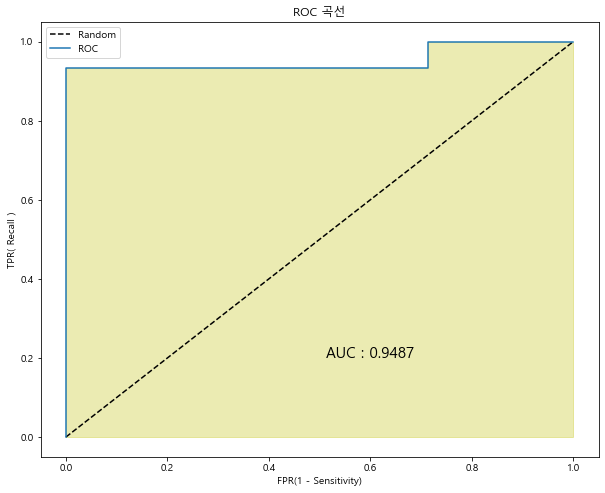

In [64]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.fill_between(fprs, tprs, color='y', alpha=0.3)
plt.annotate('AUC : 0.9487', xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

In [65]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [66]:
# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, rf_clf1.predict_proba(X_test)[:, 1])

In [67]:
thresholds = [0.2, 0.3, 0.4, 0.45,0.5]
pred_proba = rf_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.2
오차행렬
[[ 2  5]
 [ 1 14]]
정확도: 0.7273, 정밀도: 0.7368, 재현율: 0.9333, F1:0.8235, AUC:0.9524
임곗값: 0.3
오차행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333, F1:0.9032, AUC:0.9524
임곗값: 0.4
오차행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333, F1:0.9032, AUC:0.9524
임곗값: 0.45
오차행렬
[[ 6  1]
 [ 1 14]]
정확도: 0.9091, 정밀도: 0.9333, 재현율: 0.9333, F1:0.9333, AUC:0.9524
임곗값: 0.5
오차행렬
[[ 7  0]
 [ 1 14]]
정확도: 0.9545, 정밀도: 1.0000, 재현율: 0.9333, F1:0.9655, AUC:0.9524


### 최적 임곗값 적용

In [68]:
binarizer = Binarizer(threshold=0.4)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, rf_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[ 5  2]
 [ 1 14]]
정확도: 0.8636, 정밀도: 0.8750, 재현율: 0.9333, F1:0.9032, AUC:0.9524


In [69]:
# predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, custom_predict)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8636


In [70]:
from sklearn.tree import export_graphviz
from sklearn import tree

feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수",  "전년_동월_대비"]
target_names = ["0", "1"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
export_graphviz(dt_clf, 
                out_file="./data/tree_corona.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

<Figure size 1152x720 with 0 Axes>

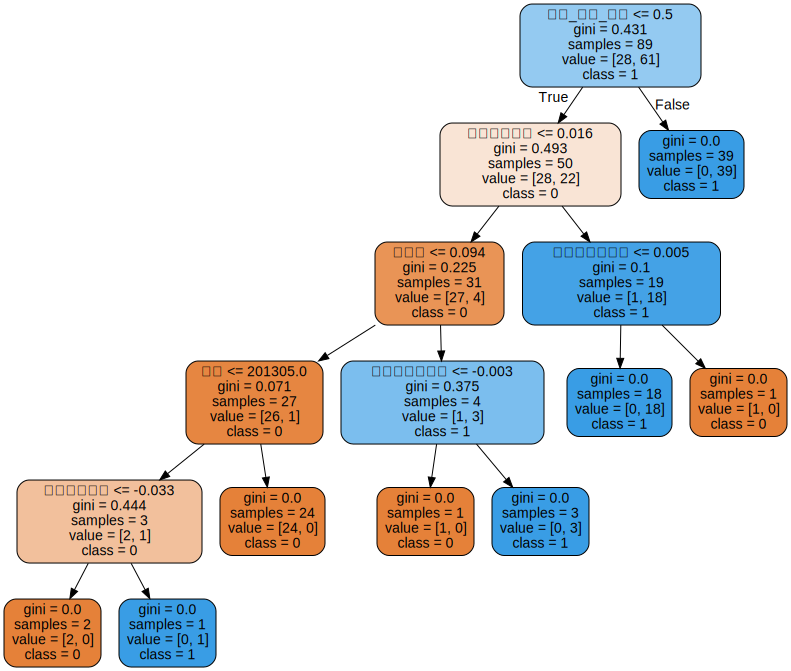

In [71]:
import graphviz

with open('./data/tree_corona.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# gini : 낮을수록 데이터 균일도가 높은 것
# samples = 89 : 전체 데이터 개수가 89개
# value = [26, 63] : 레이블 0이 26개, 1이 63개

### 랜덤 포레스트 시각화

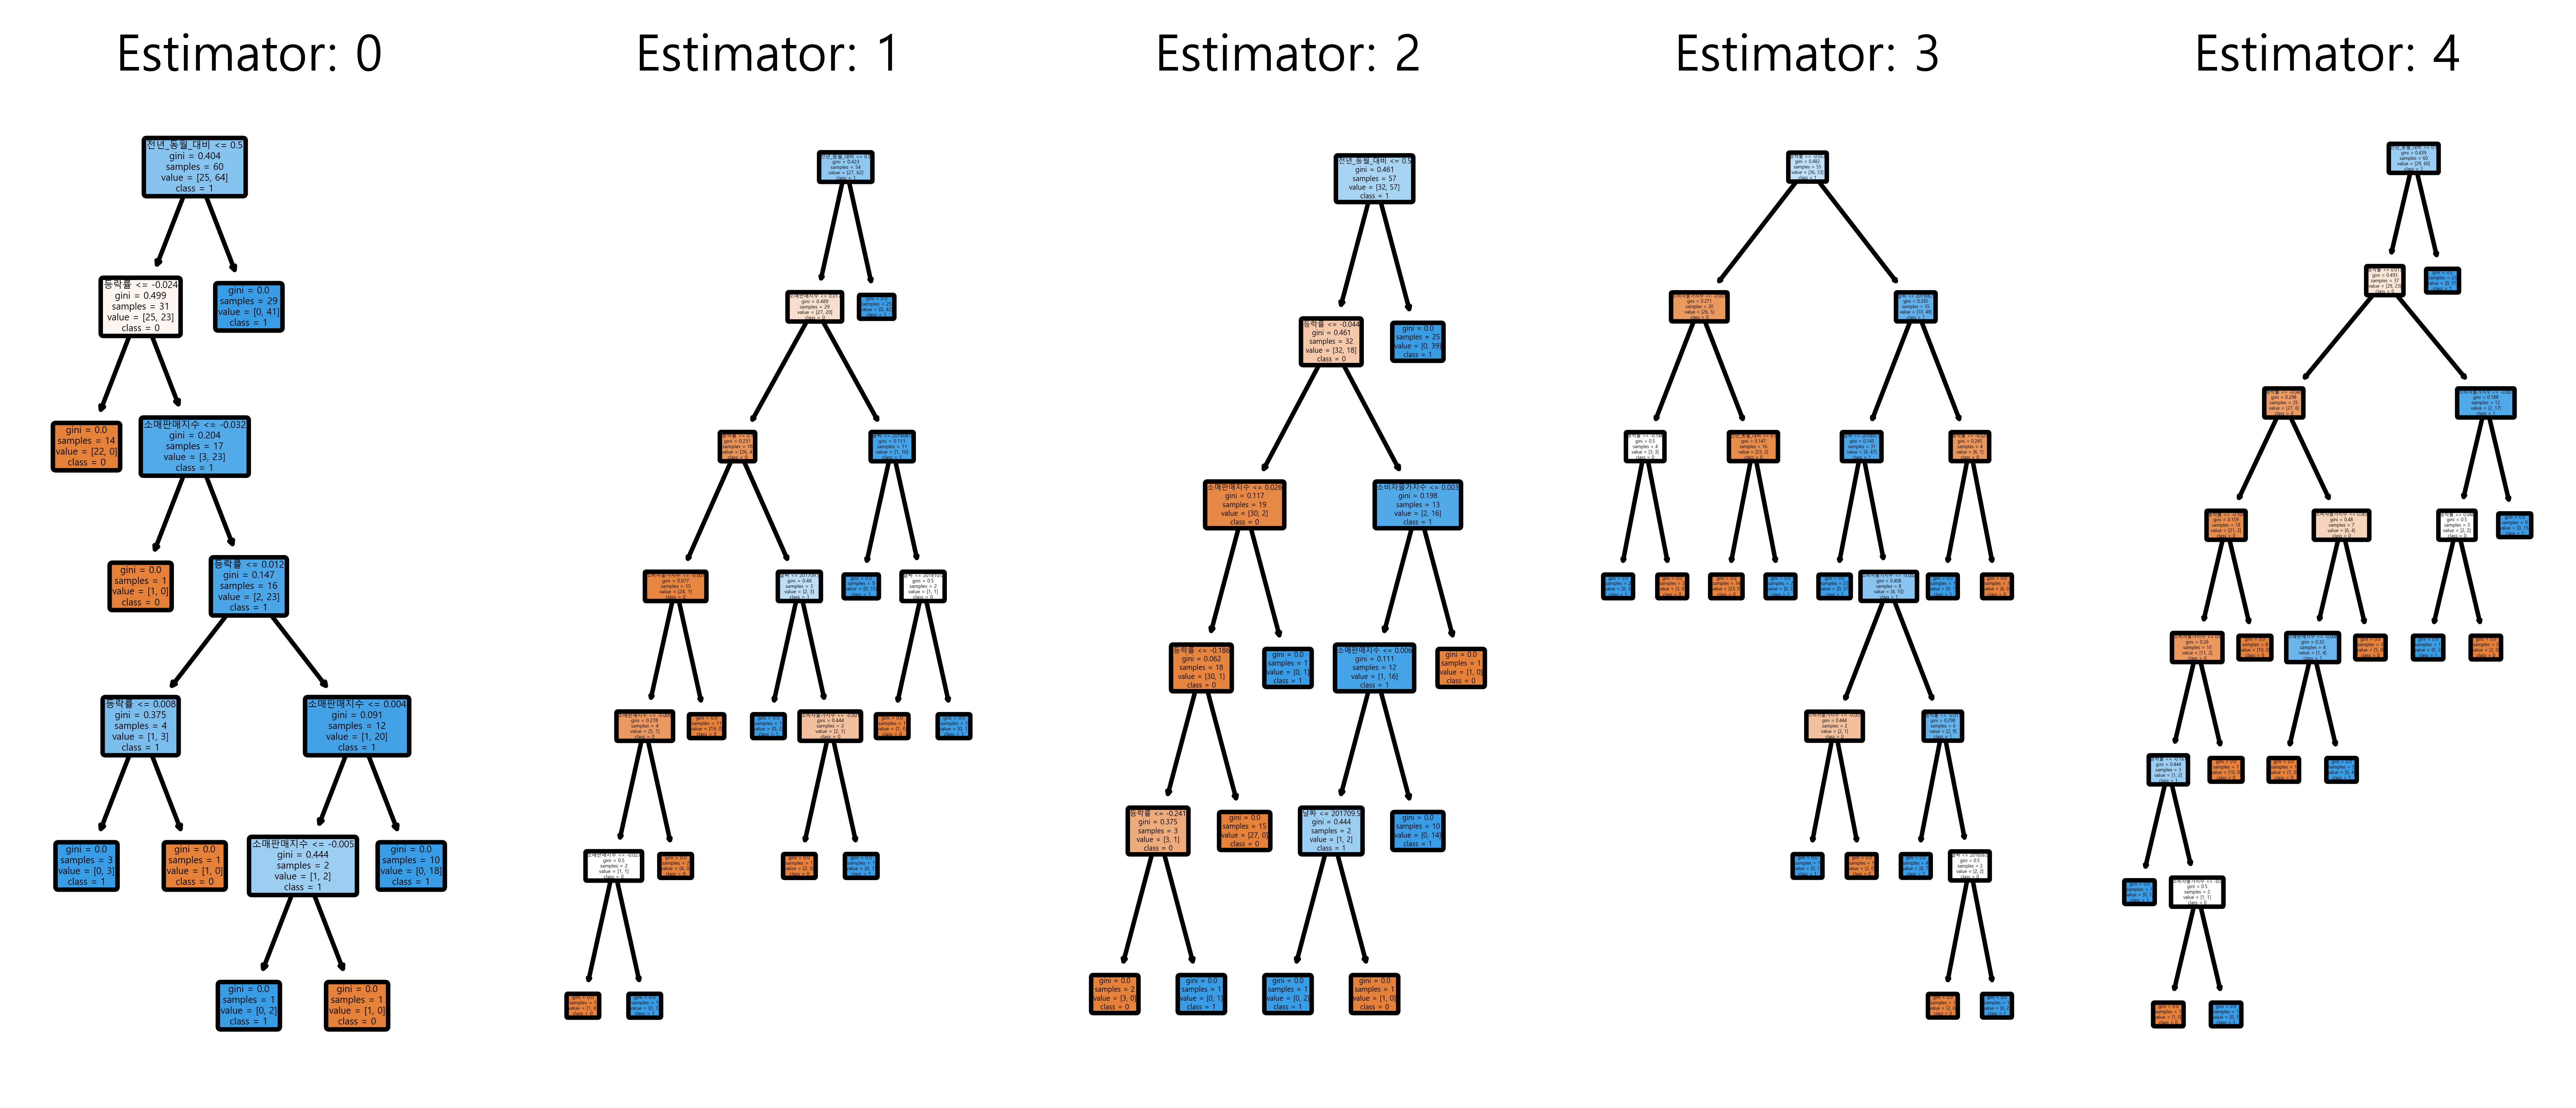

In [72]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 4), dpi=900)

for index in range(0, 5):
    tree.plot_tree(rf_clf.estimators_[index],
                   feature_names = feature_names, 
                   class_names=target_names,
                   impurity=True,
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_clf1_5trees.png')

In [73]:
feature_names = ["날짜", "등락률", "소비자물가지수", "소매판매지수",  "전년_동월_대비"]
target_names = ["0", "1"]

plt.rcParams["font.family"] = "Malgun Gothic"

sub_tree_45 = gb_clf.estimators_[45, 0]

plt.figure(figsize=(16,10))
export_graphviz(sub_tree_45, 
                out_file="./data/gb_tree_45.dot",
                class_names=target_names, 
                feature_names=feature_names,
                impurity=False, 
                filled=True, 
                rounded=True
                )

<Figure size 1152x720 with 0 Axes>

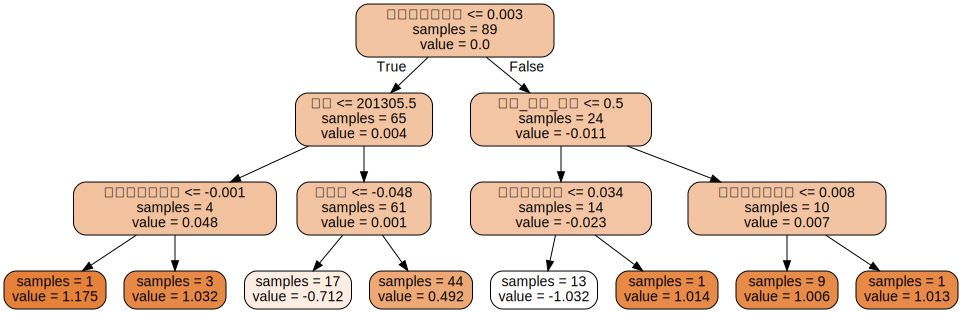

In [74]:
with open('./data/gb_tree_45.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### SARIMA

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df2 = df.copy()
df2

,날짜,월,서적/문구,소비자물가지수,소매판매지수,동월_평균_등락률,전체_평균_대비,전년_동월_대비,소비
0,201212,12,0.118333,0.001782,0.023590,0.164177,1,1,1
1,201301,1,-0.069215,0.005999,-0.086172,-0.077975,0,0,0
2,201302,2,-0.107126,0.003343,-0.048246,-0.093226,0,0,0
3,201303,3,0.471158,-0.000924,0.078341,0.390163,1,1,1
4,201304,4,-0.204835,-0.001388,-0.018162,-0.222949,0,0,1
...,...,...,...,...,...,...,...,...,...
106,202110,10,-0.008680,0.001745,0.018745,-0.045187,0,1,1
107,202111,11,-0.053841,0.005031,-0.002400,0.007351,0,0,0
108,202112,12,0.185547,0.001637,0.020048,0.164177,1,1,1
109,202201,1,-0.050630,0.006248,-0.076258,-0.077975,0,0,0


In [ ]:
df2['날짜'] = pd.to_datetime(df2['날짜'], format='%Y%m')
df2['날짜'] = df2['날짜'].dt.strftime('%Y%m') 
df2.set_index("날짜", inplace=True) 
df2

,월,서적/문구,소비자물가지수,소매판매지수,동월_평균_등락률,전체_평균_대비,전년_동월_대비,소비
날짜,,,,,,,,
201212,12,0.118333,0.001782,0.023590,0.164177,1,1,1
201301,1,-0.069215,0.005999,-0.086172,-0.077975,0,0,0
201302,2,-0.107126,0.003343,-0.048246,-0.093226,0,0,0
201303,3,0.471158,-0.000924,0.078341,0.390163,1,1,1
201304,4,-0.204835,-0.001388,-0.018162,-0.222949,0,0,1
...,...,...,...,...,...,...,...,...
202110,10,-0.008680,0.001745,0.018745,-0.045187,0,1,1
202111,11,-0.053841,0.005031,-0.002400,0.007351,0,0,0
202112,12,0.185547,0.001637,0.020048,0.164177,1,1,1


In [76]:
mdl = SARIMAX(endog=df2['소비'], order=(1, 1, 0),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
res = mdl.fit()

NameError: name 'df2' is not defined

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                   소비   No. Observations:                  111
Model:             SARIMAX(1, 1, 0)x(1, 2, [1], 12)   Log Likelihood                -113.568
Date:                              Wed, 31 Aug 2022   AIC                            235.135
Time:                                      02:35:42   BIC                            244.953
Sample:                                  12-01-2012   HQIC                           239.086
                                       - 02-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5920      0.104     -5.678      0.000      -0.796      -0.388
ar.S.L12      -0.5061      0.122     -4.139      0.000      -0.746      -0.266
ma.S.L12      -0.9984     41.414     -0.024      0.981     -82.167      80.171
sigma2         0.5287     21.842      0.024      0.981     -42.281      43.338
===================================================================================
Ljung-Box (L1) (Q):                   3.71   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.05   Prob(JB):                         0.76
Heteroskedasticity (H):               1.33   Skew:                            -0.18
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

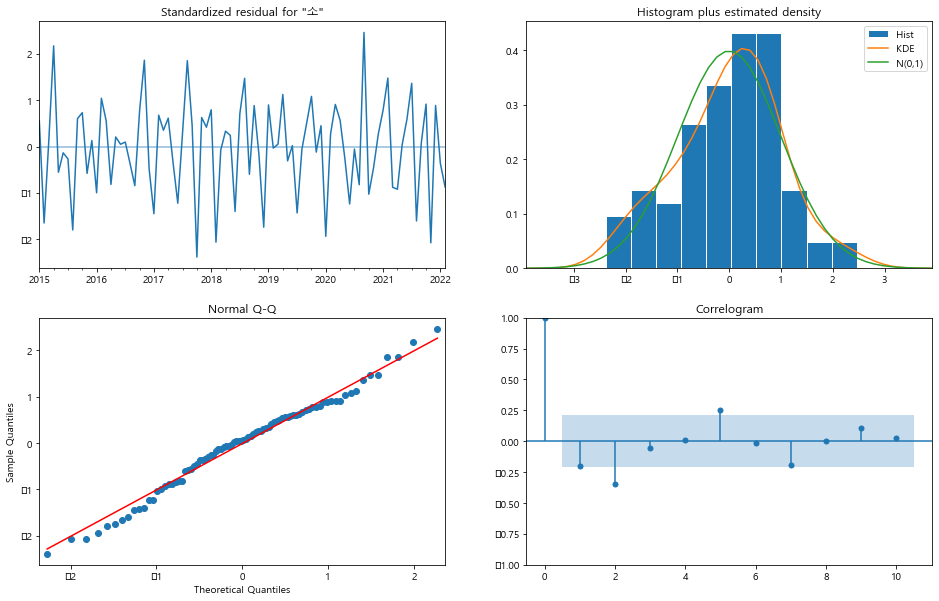

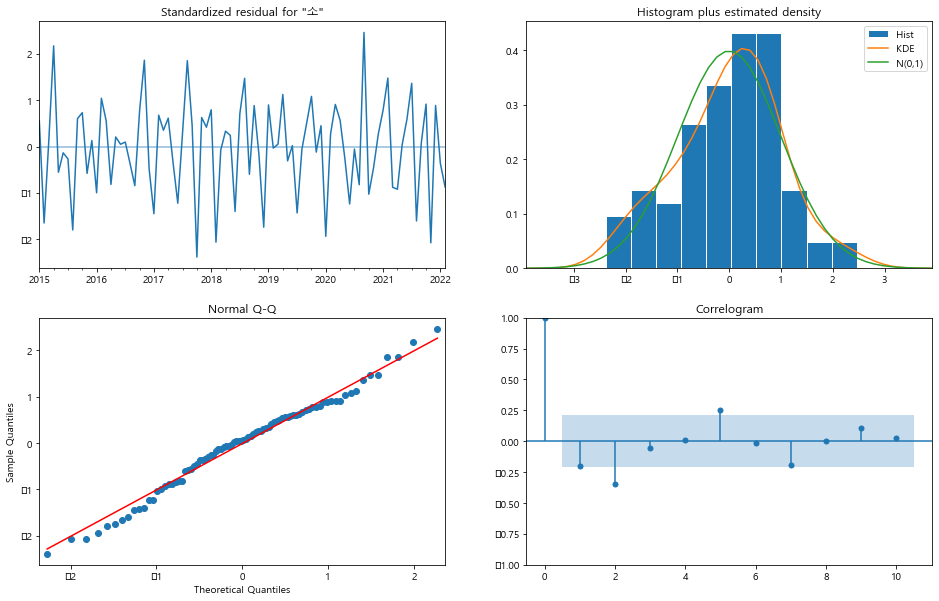

In [ ]:
res.plot_diagnostics(figsize=(16, 10))

In [ ]:
pred = res.get_prediction(start=df2.index[97], 
                          end=df2.index[-1],
                          dynamic=True)

In [ ]:
df2.index = pd.to_datetime(df2.index, format='%Y%m')

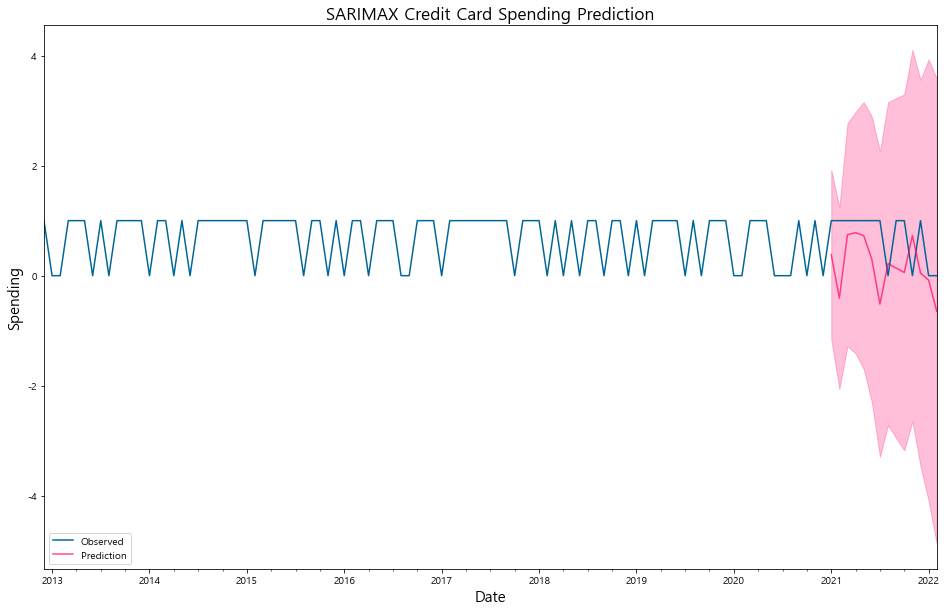

In [ ]:
import matplotlib.pyplot as plt

pred_ci = pred.conf_int()

plt.rcParams['axes.unicode_minus'] = False

## Plot in-sample-prediction
ax = df2['소비'].plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, color='#ff0066');

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25)
## style the plot
ax.set_title('SARIMAX Credit Card Spending Prediction', fontsize=17)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Spending', fontsize=15)
plt.legend(loc='lower left')
plt.show()

c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\wndgj\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


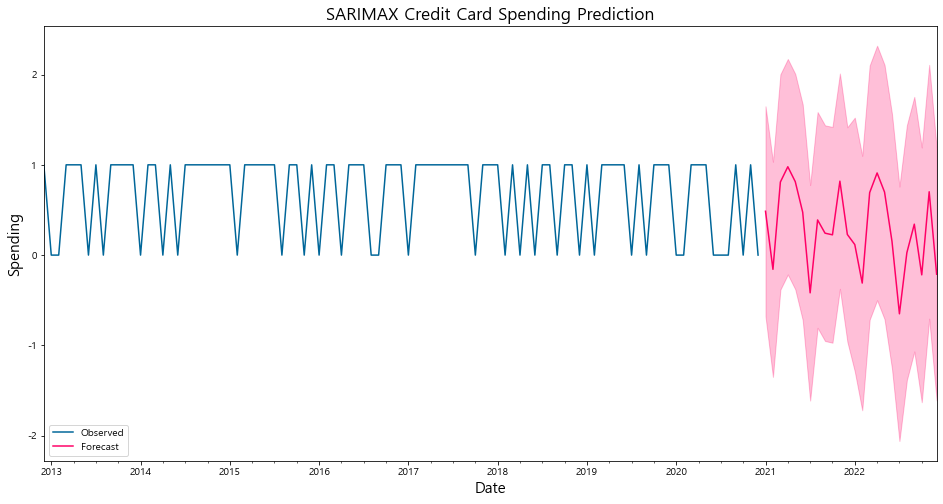

In [ ]:
res1 = sm.tsa.statespace.SARIMAX(df2['소비'].iloc[:97],
                                order=(2, 1, 3),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

## Get forecast 120 steps ahead in future
pred_uc = res1.get_forecast(steps=24)

## Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

## Plot time series and long-term forecast
ax = df2['소비'].iloc[:97].plot(label='Observed', figsize=(16, 8), color='#006699');
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25)

ax.set_title('SARIMAX Credit Card Spending Prediction', fontsize=17)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Spending', fontsize=15)
plt.legend(loc='lower left')
plt.show()